In [1]:
import numpy as np
from sklearn.decomposition import PCA

import seaborn as sns; 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from SOM import Lattice_1D
from Visualization import plot2D

# First step : Generation of the Data

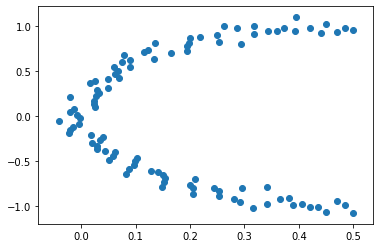

In [7]:
nb_values = 100
nb_train = 10

theta = np.linspace(np.pi/2, 3/2*np.pi, nb_values)
theta = theta[np.random.permutation(nb_values)]
r_noise = np.random.normal(1, 0.05, nb_values)
X, Y = r_noise*np.cos(theta), r_noise*np.sin(theta)
X = (X+1)/2

plot2D(ref_values=(X, Y))


batch = np.concatenate([[X, Y]], axis = 0).swapaxes(1,0)
train_batch = np.repeat([batch], nb_train, axis = 0).reshape([-1, 2])

We will try to fit this dataset

# Second Step: Creation of the Lattice and Initialization

In [8]:
input_shape = [2]
lattice_dim = np.array([100])

lattice = Lattice_1D(input_shape, lattice_dim)

In [12]:
lattice.set_update_function( epsilon_0 = 0.7, sigma_0 = 10, t_max = 1000)

Initialization of the Weight with PCA

In [13]:
lattice.init_weight_pca(batch)

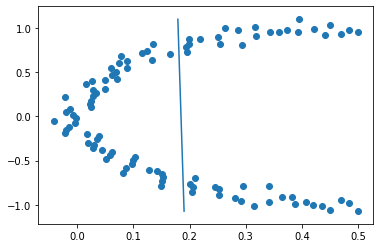

In [14]:
plot2D(lattice, (X,Y))

# Last Step: Training

In [15]:
lattice.train(train_batch)

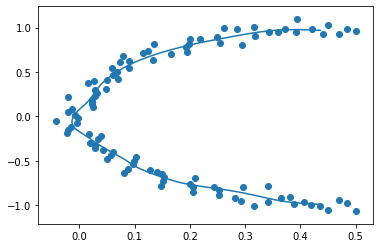

In [16]:
plot2D(lattice, (X,Y))

Not bad !